# Business Question

use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. we’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes

# importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Understanding

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(test_df.shape)
print(train_df.shape)

(418, 11)
(891, 12)


In [7]:
train_df.info()
print('_'*50,"\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
for col in train_df.columns:
    print(col,":",train_df[col].nunique())
    print(train_df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

PassengerId : 891
1      1
599    1
588    1
589    1
590    1
Name: PassengerId, dtype: int64

********************

Survived : 2
0    549
1    342
Name: Survived, dtype: int64

********************

Pclass : 3
3    491
1    216
2    184
Name: Pclass, dtype: int64

********************

Name : 891
Braund, Mr. Owen Harris             1
Boulos, Mr. Hanna                   1
Frolicher-Stehli, Mr. Maxmillian    1
Gilinski, Mr. Eliezer               1
Murdlin, Mr. Joseph                 1
Name: Name, dtype: int64

********************

Sex : 2
male      577
female    314
Name: Sex, dtype: int64

********************

Age : 88
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

********************

SibSp : 7
0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64

********************

Parch : 7
0    678
1    118
2     80
5      5
3      5
Name: Parch, dtype: int64

********************

Ticket : 681
347082      7
CA. 2343    7
1601        7
31012

# EDA

In [11]:
categorical=list(train_df.select_dtypes(include=['object']).columns)
numerical=list(train_df.select_dtypes(include=['number']).columns)

In [12]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [13]:
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
numerical.remove('Survived')

In [15]:
categorical.remove('Name')
categorical.remove('Cabin')
categorical.remove('Ticket')

In [16]:
train_df[categorical].nunique()

Sex         2
Embarked    3
dtype: int64

## 1. Category features

In [17]:
#global mean is measured on target only
global_mean=train_df.Survived.mean()
round(global_mean,2)

0.38

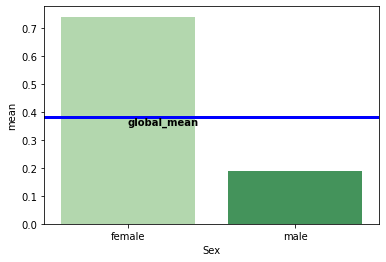

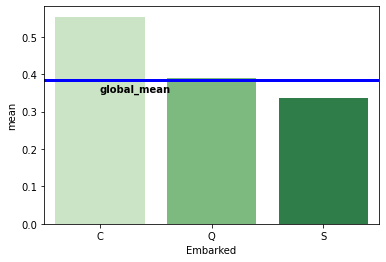

In [18]:
# for all categorical features
for feature in categorical:
    train_df_group=train_df.groupby(by=feature).Survived.agg(['mean']).reset_index()
    graph=sns.barplot(x=feature,y='mean',data=train_df_group,palette='Greens')
    graph.axhline(global_mean,linewidth=3,color='b')
    plt.text(0,global_mean-0.03,'global_mean',color='black',weight='semibold')
    plt.show()

### What are survived more females or males ?

> Females are the most passengers are survived

### What are most Embarked survived?

> Emarked C are the most class is survived

## 2. Nmeric Features

<AxesSubplot:>

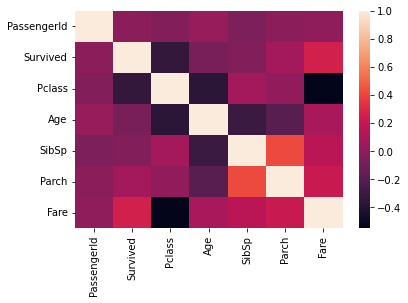

In [19]:
sns.heatmap(train_df.corr())

## What's age distribution of age of passengers ?

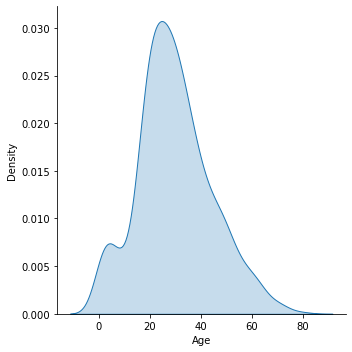

In [20]:
sns.displot(train_df,x='Age',kind='kde',fill=True)

## What are ages of passengers in different pclasses are survived?

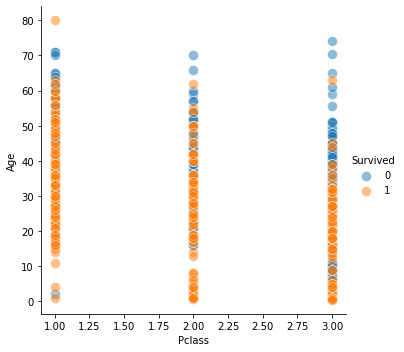

In [21]:
pal=dict(Lunch='seagreen',Dinner='0.7')
g=sns.FacetGrid(train_df,hue='Survived',height=5)
g.map(sns.scatterplot,'Pclass','Age',s=100,alpha=0.5)
g.add_legend();

> class 3 have the most survived passengers but it isn't clear more , so there are other factors

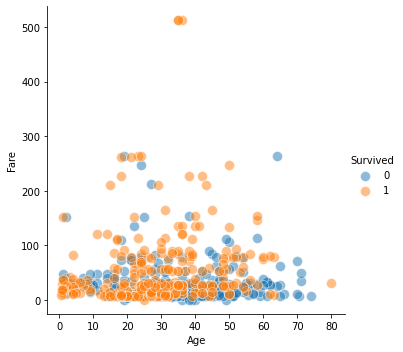

In [22]:
pal=dict(Lunch='seagreen',Dinner='0.7')
g=sns.FacetGrid(train_df,hue='Survived',height=5)
g.map(sns.scatterplot,'Age','Fare',s=100,alpha=0.5)
g.add_legend();

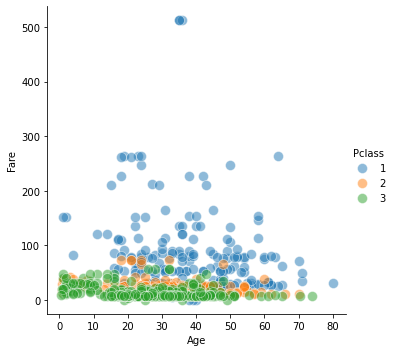

In [23]:
pal=dict(Lunch='seagreen',Dinner='0.7')
g=sns.FacetGrid(train_df,hue='Pclass',height=5)
g.map(sns.scatterplot,'Age','Fare',s=100,alpha=0.5)
g.add_legend();

> 
1. children and teenagers had survived
2. passenger with low fare ticket, could not survived and vice versa
3. The passenger class 1 people's ticket fare were high and had survived in opposite of passenger on class 2 and 3

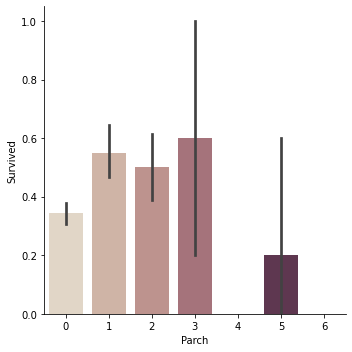

In [24]:
sns.catplot(data=train_df,x='Parch',y='Survived',kind='bar',palette='ch:.25');

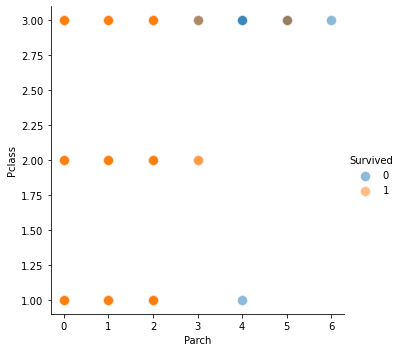

In [25]:
pal=dict(Lunch='seagreen',Dinner='0.7')
g=sns.FacetGrid(train_df,hue='Survived',height=5)
g.map(sns.scatterplot,'Parch','Pclass',s=100,alpha=0.5)
g.add_legend();

> passengers who have 5 parchs didn't survived because pclass is 3 but the most passsengers with parchs 3 despite pclass are survived

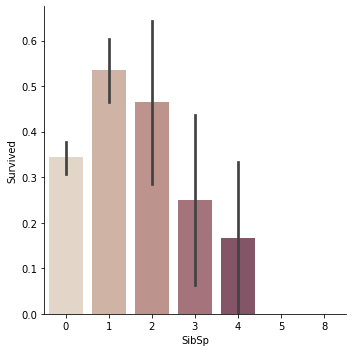

In [26]:
sns.catplot(data=train_df,x='SibSp',y='Survived',kind='bar',palette='ch:.25');

> If passenger is alone or has one or two SibSb so has the most opportunity to be survived

# Data Wrangling

In [27]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [28]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
for df in combine:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [31]:
for df in combine: df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


> Women passengers are more passengers are survived

In [32]:
for df in combine:
    df['Title']=df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    df['Title'] = df['Title'].fillna(0)
train_df['Title'].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [34]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [35]:
for df in combine:
    df.Sex=(df.Sex=='female').astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [36]:
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,22.0,1,0,7.2500,S,1,2
1,1,1,1,38.0,1,0,71.2833,C,3,2
2,1,3,1,26.0,0,0,7.9250,S,2,1
3,1,1,1,35.0,1,0,53.1000,S,3,2
4,0,3,0,35.0,0,0,8.0500,S,1,1


In [38]:
for df in combine:
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


> The probabilty of surviving passenger if he is alone is great.

In [39]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [40]:
for df in combine:
    df['Embarked'] = df['Embarked'].fillna(train_df.Embarked.dropna().mode()[0])
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
for df in combine:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,3,0
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,0
4,0,3,0,35.0,8.0500,0,1,1


In [42]:
for df in combine:
    df['Embarked'] = df['Embarked'].fillna(train_df.Embarked.dropna().mode()[0])
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


> Embarked c is the most embarked which passengers are survived 

In [43]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,7.8292,2,1.0,1
1,893,3,1,47.0,7.0000,0,3.0,0
2,894,2,0,62.0,9.6875,2,1.0,1
3,895,3,0,27.0,8.6625,0,1.0,1
4,896,3,1,22.0,12.2875,0,3.0,0
